# Fitting data

QExPy makes it straightforwar to fit data to a model. QExPy has a few built in models (linear, polynomial, gaussian, exponential), but makes it easy for users to provide their own models. 

Internally, QExPy fits XYDataSets; this means that one can fit a dataset regardless of whether that dataset is displayed in a Plot Object. XYDataSets can also be fit to multiple models, and we are able to recall the results of the fits to the various models of that single dataset. By default, the Plot Object will only display the last fit for a dataset. 

Currently, QExPy uses the least-squares fitting routine from the scipy.optimize package to perform the fit. When the fit results are displayed, the correlation between parameters are taken into account when drawing the error band around the fit line.

As usual, we start by importing the QExPy module and choosing the plot engine.


In [1]:
import qexpy as q
q.plot_engine="mpl" # choose bokeh or mpl

Loading BokehJS ...

## Fitting a dataset and then adding it to the plot
Let's create a dataset and fit it to a linear model. As you can see, the call to the fit() method will output the results of the fit. The fit method can take a variety of arguments that we will explore in this notebook.

In [2]:
#Initialize the data set:
xy1 = q.XYDataSet( xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [0.6, 1.6, 3.5, 4.1, 4.6, 5.6, 6.1, 7.9, 8.7, 9.8],
                  yerr = 0.5,
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'xydata')

results = xy1.fit("linear")


-----------------Fit results-------------------
Fit of  xydata  to  linear
Fit parameters:
xydata_linear_fit0_fitpars_intercept = -0.1 +/- 0.3,
xydata_linear_fit0_fitpars_slope = 0.98 +/- 0.04

Correlation matrix: 
[[ 1.    -0.886]
 [-0.886  1.   ]]

chi2/ndof = 0.44/7
---------------End fit results----------------



We can display the dataset by initializing a Plot Object. In this case, since the dataset has a fit associated to it, the Plot Object will automatically display the results of the fit:

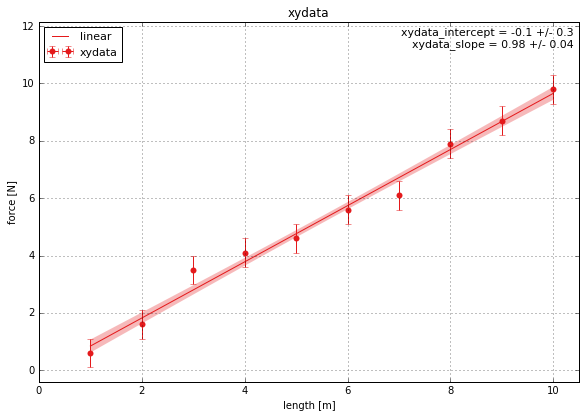

In [3]:
fig1 = q.MakePlot(xy1)
fig1.show()

## Adding a dataset to a plot, and then fitting it
As you may have noted from previous notebooks, we can also do things the other way around. We can first create the Plot Object from the data set, and then fit the dataset from the Plot Object. If the Plot Object contains multiple datasets, by default it will fit the last one that was added:

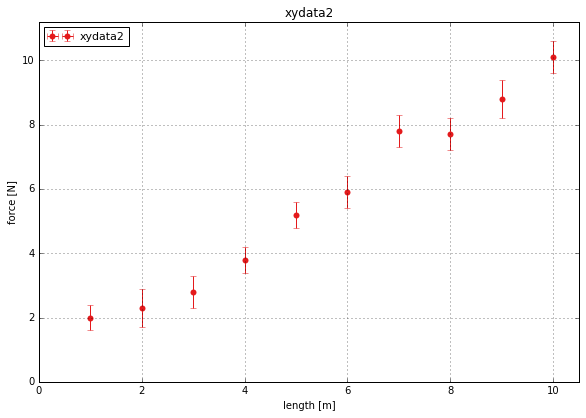

In [4]:
#initialize the dataset
xy2 = q.XYDataSet(xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [2., 2.3, 2.8, 3.8, 5.2, 5.9, 7.8, 7.7, 8.8, 10.1],
                  yerr = [0.4, 0.6, 0.5, 0.4, 0.4, 0.5, 0.5, 0.5, 0.6, 0.5],
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'xydata2')

#create the plot object
fig2 = q.MakePlot(xy2)
#show the figure, it will have no fit:
fig2.show()


We can now use the fit() command from the Plot Object to perform the fit. Internally, this just calls the fit() method on the dataset.

-----------------Fit results-------------------
Fit of  xydata2  to  polynomial
Fit parameters:
xydata2_polynomial_fit0_fitpars_par_0 = 1.0 +/- 0.5,
xydata2_polynomial_fit0_fitpars_par_1 = 0.7 +/- 0.2,
xydata2_polynomial_fit0_fitpars_par_2 = 0.02 +/- 0.02

Correlation matrix: 
[[ 1.    -0.9    0.792]
 [-0.9    1.    -0.969]
 [ 0.792 -0.969  1.   ]]

chi2/ndof = 1.42/6
---------------End fit results----------------



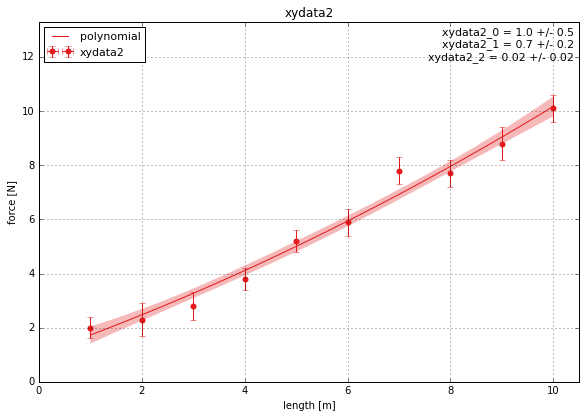

In [5]:
#fit the data to a second order polynomial:
fig2.fit("pol2")
#it will now show the results of the fit
fig2.show()

## Adding fits to the same dataset
Let's now fit the second data set to a linear model. As you can see, QExPy will only display the latest fit to the dataset, even if the dataset still is aware of both fits.

-----------------Fit results-------------------
Fit of  xydata2  to  linear
Fit parameters:
xydata2_linear_fit1_fitpars_intercept = 0.5 +/- 0.3,
xydata2_linear_fit1_fitpars_slope = 0.93 +/- 0.05

Correlation matrix: 
[[ 1.   -0.88]
 [-0.88  1.  ]]

chi2/ndof = 1.84/7
---------------End fit results----------------



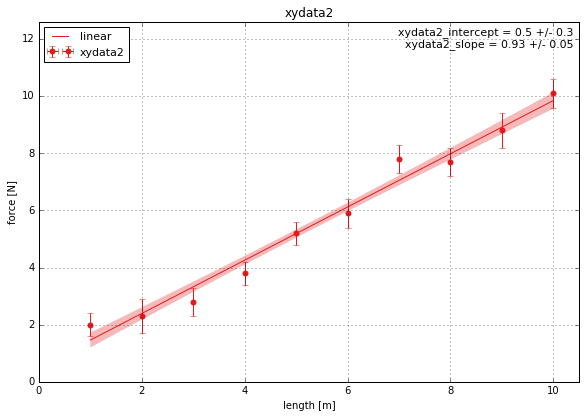

In [6]:
#Here we fit the xy2 dataset to a linear model, and then display it.
#The following 2 methods are equivalent:
xy2.fit("linear")
#or:
#fig2.fit("linear") #this is equivalent, since fig2 only has the 1 dataset
fig2.show()

In [7]:
#however, the dataset knows of both fits:
print("results from the first fit")
xy2.print_fit_results(fitindex=0) # results of the first fit

print("results from the second fit")
xy2.print_fit_results(fitindex=1) # results of the second fit


results from the first fit
-----------------Fit results-------------------
Fit of  xydata2  to  polynomial
Fit parameters:
xydata2_polynomial_fit0_fitpars_par_0 = 1.0 +/- 0.5,
xydata2_polynomial_fit0_fitpars_par_1 = 0.7 +/- 0.2,
xydata2_polynomial_fit0_fitpars_par_2 = 0.02 +/- 0.02

Correlation matrix: 
[[ 1.    -0.9    0.792]
 [-0.9    1.    -0.969]
 [ 0.792 -0.969  1.   ]]

chi2/ndof = 1.42/6
---------------End fit results----------------

results from the second fit
-----------------Fit results-------------------
Fit of  xydata2  to  linear
Fit parameters:
xydata2_linear_fit1_fitpars_intercept = 0.5 +/- 0.3,
xydata2_linear_fit1_fitpars_slope = 0.93 +/- 0.05

Correlation matrix: 
[[ 1.   -0.88]
 [-0.88  1.  ]]

chi2/ndof = 1.84/7
---------------End fit results----------------



## Displaying multiple data sets that each have fits

There is no inherent difference in showing multiple datasets in the case where they have fits. If we want to show dataset xy2 with its latest fit on fig1 along with dataset xy and its latest fit, we just add xy2 to fig1:


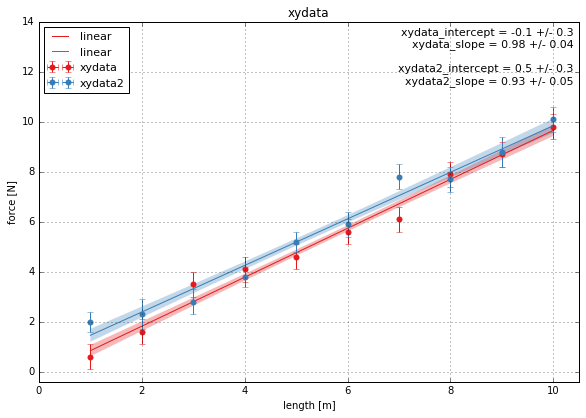

In [8]:
fig1.add_dataset(xy2)
fig1.show()

## Showing fit residuals
By using the add_residual() method of the Plot Object, we can ask to have residual added to the plot. add_residuals() can be called at any time after initializing the Plot Object, and it will only actually add residuals if there are datasets in the Plot Object which have fits associated with them. To illustrate this, we add a third dataset to fig1, but without fitting it. As you can see, the residuals are only drawn for the first 2 data sets.


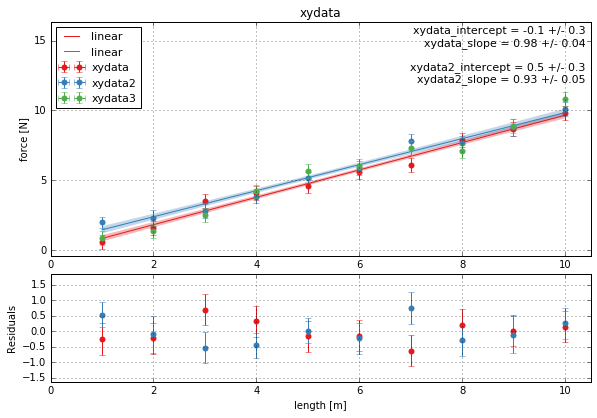

In [9]:
#A new dataset
xy3 = q.XYDataSet( xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [0.9, 1.4, 2.5, 4.2, 5.7, 6., 7.3, 7.1, 8.9, 10.8],
                  yerr = 0.5,
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'xydata3')

fig1.add_dataset(xy3)
fig1.add_residuals()
fig1.show()

## Fitting to other buit-in functions

QExPy has built in support for fitting to: linear, polynomials (currently up to 9th order), exponential, and gaussian. For example, to fit a dataset to a second order polynomial, we call fit("pol2"): 



-----------------Fit results-------------------
Fit of  dataset0  to  polynomial
Fit parameters:
dataset0_polynomial_fit0_fitpars_par_0 = -0.4 +/- 0.4,
dataset0_polynomial_fit0_fitpars_par_1 = 0.2 +/- 0.3,
dataset0_polynomial_fit0_fitpars_par_2 = 0.98 +/- 0.03

Correlation matrix: 
[[ 1.    -0.84   0.706]
 [-0.84   1.    -0.965]
 [ 0.706 -0.965  1.   ]]

chi2/ndof = 2.62/16
---------------End fit results----------------



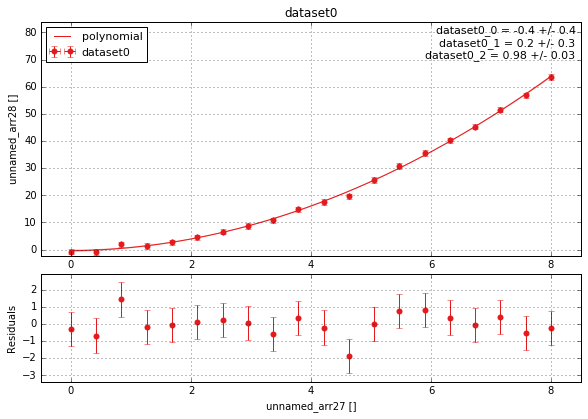

In [10]:
#We first create a data set programatically:
import numpy as np
xdata = np.linspace(0,8,20)
ydata = np.random.normal(xdata**2, 0.5)
xy4 = q.XYDataSet(xdata=xdata, ydata=ydata, yerr=1)

fig3 = q.MakePlot(xy4)
xy4.fit("pol2")
fig3.add_residuals()
fig3.show()



## Fitting to custom functions

We can define our own functions to fit to the data. The function must be defined with the following syntax:

```python
def model (x, *pars):
    return pars[0]*np.sin(pars[1]*x)
```

A few comments:
  * The first argument, x, is the dependent variable
  * The second argument, \*pars, is an array of parameters that we want to determine
  * If you use any math function, you need to use the ones provided by numpy (you must import numpy)
  * When calling the fit() function, **you must provide a guess for the parameter values**. In addition to helping the fit converge, this is necessary for the fitter to know how long the \*pars array really is
  
Thus the function above corresponds to a sine function where we want to fit for the amplitude (pars[0]) and the frequency (pars[1]).

Below, we give an example of fitting a dataset with a custom function.


-----------------Fit results-------------------
Fit of  dataset1  to  custom
Fit parameters:
dataset1_custom_fit0_fitpars_par_0 = 4.7 +/- 0.2,
dataset1_custom_fit0_fitpars_par_1 = 0.492 +/- 0.008

Correlation matrix: 
[[ 1.     0.252]
 [ 0.252  1.   ]]

chi2/ndof = 0.08/17
---------------End fit results----------------



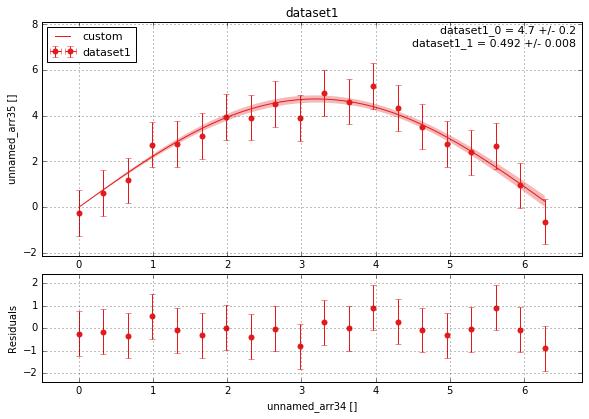

In [11]:
#We first create a data set programatically:
import numpy as np
#regularly spaced values along the x axis
xdata = np.linspace(0,6.28,20)
#generate data from a sine wave of frequency 0.5 and amplitude 5
ydata = np.random.normal(5*np.sin(0.5*xdata), 0.5)
#make a dataset
xy5 = q.XYDataSet(xdata=xdata, ydata=ydata, yerr=1)
#initialize the plot
fig4 = q.MakePlot(xy5)

#define our model with 2 parameters:
def model (x, *pars):
    return pars[0]*np.sin(pars[1]*x)

#fit the model - we must provide a guess for the parameters
xy5.fit(model, parguess=[1,1])
fig4.add_residuals()
fig4.show()